In [ ]:
from google.colab import drive
drive.mount('/content/drive' , force_remount=True) 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Libraries that I might need
from fastai import * 
from fastai.vision import * 
from fastai.callbacks import *

from sklearn.metrics import roc_auc_score,f1_score
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline 

In [ ]:
#  Reading th CSVs
train_set = pd.read_csv('/content/drive/My Drive/train.csv')
df_train = pd.DataFrame(train_set)
df_train.head()


,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [ ]:
# df_test = pd.DataFrame(test_set)
# df_test.head(20)

In [ ]:
path_train = '/content/drive/My Drive/train'
# path_test = '/content/drive/My Drive/test'

In [ ]:
fnames = get_image_files(path_train)
fnames[:5]

[PosixPath('/content/drive/My Drive/train/40140a925c43.png'),
 PosixPath('/content/drive/My Drive/train/876deb29f000.png'),
 PosixPath('/content/drive/My Drive/train/1c0cf251b426.png'),
 PosixPath('/content/drive/My Drive/train/913490237ad4.png'),
 PosixPath('/content/drive/My Drive/train/1cc58b15f466.png')]

In [ ]:
np.random.seed(2)

In [ ]:
# Drop rows from csv, the ones which aren't there.
 
# with open('/content/drive/My Drive/train.csv', 'rb') as f:
#     train = pd.read_csv(f)
#     for id_code in train:
#       train = train.dropna()
#       print(train)
# # df.drop(["path", "id_code"], axis=1, inplace = True)
# # df.head()


In [ ]:
# test = pd.read_csv('/content/drive/My Drive/test.csv')
# test.dropna()

In [ ]:
sz = 64 # our initial size will be 128*128
# Place the train and valid folders in the drive and the labels file 
# in the same directory where the folders are placed
tfms = get_transforms()


Create an ImageDataBunch from path by splitting the data in folder and labelled in a file csv_labels between a training and validation set. Use valid_pct to indicate the percentage of the total images to use as the validation set. An optional test folder contains unlabelled data and suffix contains an optional suffix to add to the filenames in csv_labels (such as '.jpg'). fn_col is the index (or the name) of the the column containing the filenames and label_col is the index (indices) (or the name(s)) of the column(s) containing the labels. Use header to specify the format of the csv header, and delimiter to specify a non-standard csv-field separator. In case your csv has no header, column parameters can only be specified as indices. If label_delim is passed, split what's in the label column according to that separator.

In [ ]:
data = (ImageList.from_csv('/content/drive/My Drive/train', 'train.csv',suffix='.png')
        .split_by_rand_pct(0.2) 
        .label_from_df()
        .transform(tfms, size=sz)
        .databunch().normalize(imagenet_stats)) 

In [ ]:
print(data)

ImageDataBunch;

Train: LabelList (2930 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
2,4,1,4,0
Path: /content/drive/My Drive/train;

Valid: LabelList (732 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
0,1,3,3,2
Path: /content/drive/My Drive/train;

Test: None


In [ ]:
print("There are total {} images in training dataset".format(len(df_train)))

There are total 3662 images in training dataset


torch.Size([3, 2136, 3216])


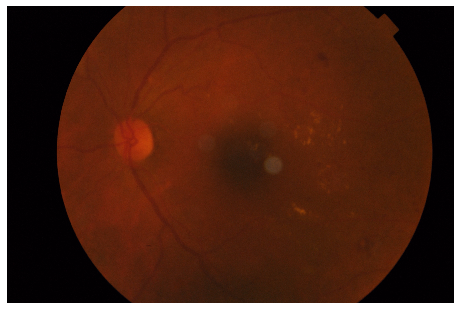

In [ ]:
img = open_image('/content/drive/My Drive/train/026dcd9af143.png')
img.show(figsize = (8,8))
print(img.shape)

In [ ]:
data.c
data.classes

[0, 1, 2, 3, 4]

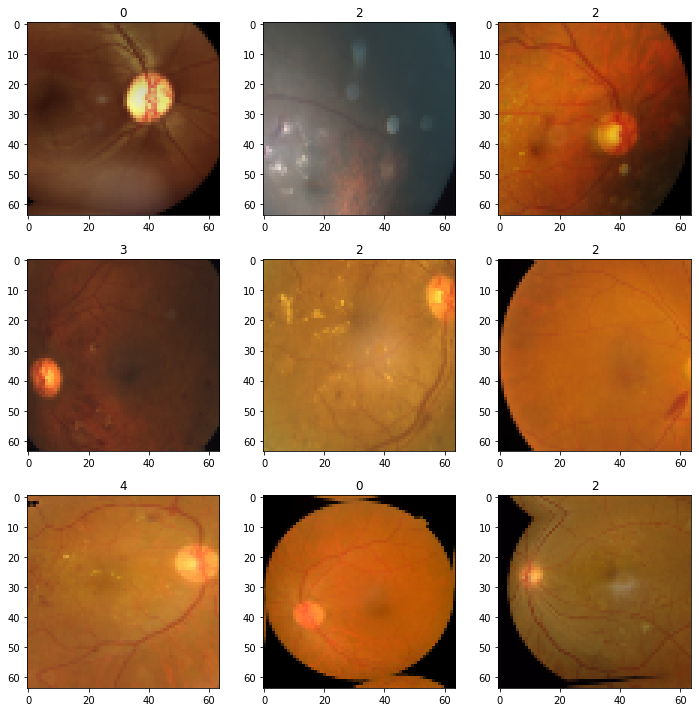

In [ ]:
data.show_batch(rows=3, figsize=(10,10), hide_axis=False)


Cohen's kappa statistic, κ , is a measure of agreement between categorical variables X and Y

It basically tells you how much better your classifier is performing over the performance of a classifier that simply guesses at random according to the frequency of each class.


Cohen’s kappa is always less than or equal to 1. Values of 0 or less, indicate that the classifier is useless

In [ ]:
kappa = KappaScore()
kappa.weights = "quadratic" 

In [ ]:
learn = cnn_learner(data, models.resnet101, metrics = [accuracy, dice, kappa, error_rate] )

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth


###Sørensen–Dice coefficient 
is a statistic used to gauge the similarity of two samples, and is given by

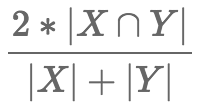

This coefficient measures the similarity between sets X and Y. If the two sets are identical (i.e. they contain the same elements), the coefficient is equal to 1.0, while if X and Y have no elements in common, it is equal to 0.0. Otherwise it is somewhere in between.

In [ ]:
learn.fit_one_cycle(20)

epoch,train_loss,valid_loss,accuracy,dice,kappa_score,error_rate,time
0,1.684646,2.025786,0.678962,1.386092,0.651445,0.321038,15:21
1,1.423254,3.045138,0.668033,1.425540,0.674464,0.331967,10:04
2,1.308032,1.426805,0.676230,1.418586,0.672239,0.323770,10:23
3,1.152415,1.141584,0.689891,1.364962,0.657918,0.310109,10:31
4,1.008357,2.147004,0.706284,1.409205,0.701038,0.293716,10:35
5,0.908131,0.867946,0.724044,1.424161,0.722608,0.275956,10:53
6,0.859437,3.528458,0.709016,1.394282,0.667901,0.290984,11:01
7,0.810300,0.870349,0.740437,1.405068,0.730621,0.259563,10:32
8,0.761055,1.882206,0.734973,1.424421,0.728107,0.265027,10:34
9,0.747959,0.852061,0.728142,1.466725,0.763132,0.271858,10:27


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)


True

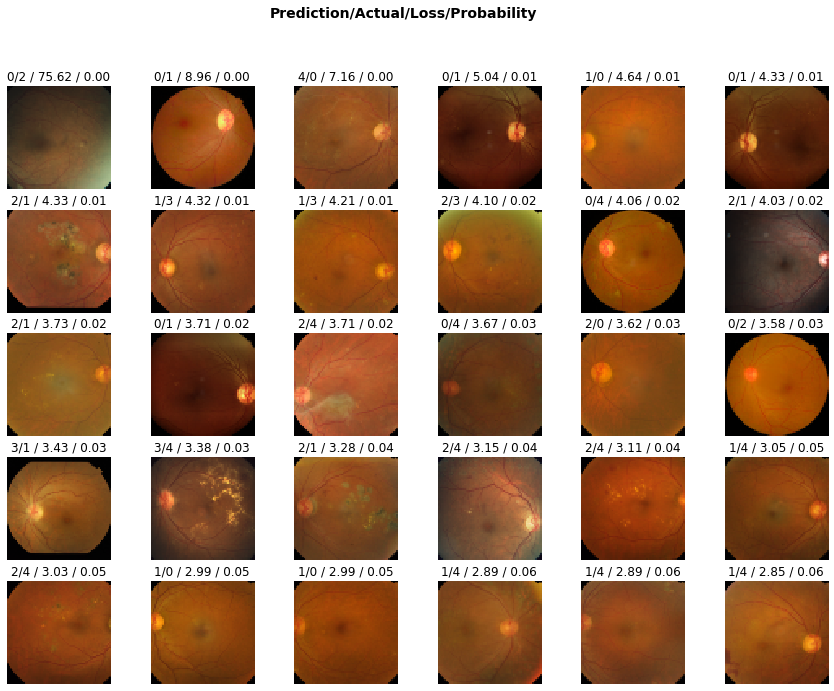

In [ ]:
interp.plot_top_losses(30, figsize=(15,11))

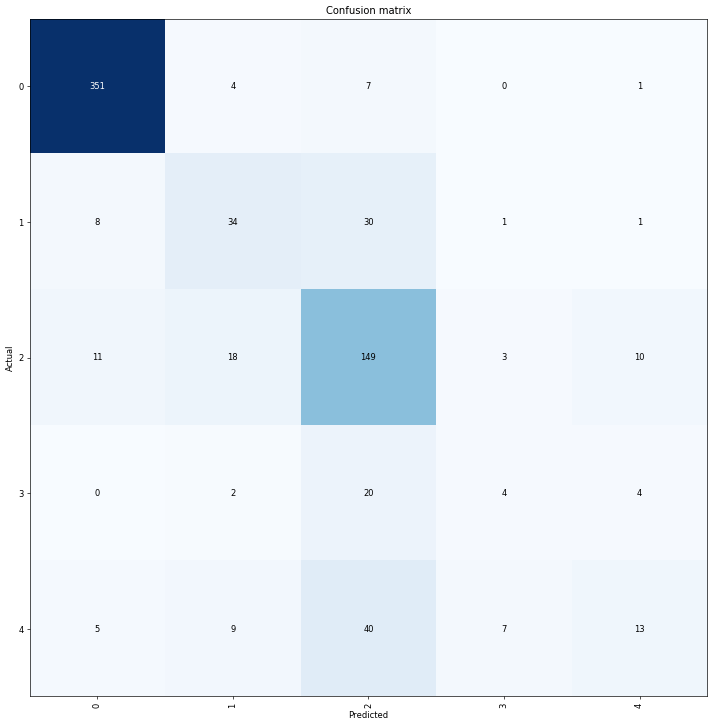

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=2)

[(4, 2, 40),
 (1, 2, 30),
 (3, 2, 20),
 (2, 1, 18),
 (2, 0, 11),
 (2, 4, 10),
 (4, 1, 9),
 (1, 0, 8),
 (0, 2, 7),
 (4, 3, 7),
 (4, 0, 5),
 (0, 1, 4),
 (3, 4, 4),
 (2, 3, 3),
 (3, 1, 2)]

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07
Min loss divided by 10: 9.12E-08


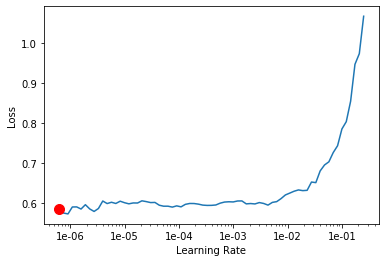

In [ ]:
learn.recorder.plot(suggestion = True)

In [ ]:
import os, os.path

# simple version for working with CWD
print (len([name for name in os.listdir('.') if os.path.isfile(name)]))

0


In [ ]:
learn.unfreeze()
#we break this up. Lower layers change weights more slowly than higher layers. Run twice
learn.fit_one_cycle(20, max_lr=slice(1e-6,1e-2))

epoch,train_loss,valid_loss,accuracy,dice,kappa_score,error_rate,time


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_top_losses(5, figsize=(40,41))

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
img = open_image('/content/drive/My Drive/train/014508ccb9cb.png')
img.show(figsize = (8,8))
print(img.shape)

In [ ]:
from fastai.widgets import *
DatasetFormatter().from_toplosses(learn)

Image cleaner for top losses

In [ ]:
ds, idxs = DatasetFormatter().from_toplosses(learn)
ImageCleaner(ds, idxs, path_train)

Image cleaner for duplicates

In [ ]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)
ImageCleaner(ds, idxs, path, duplicates=True)